## AlexNet

### 1、经典机器学习

- 虽然上世纪90年代就有了一些神经网络加速卡，但仅靠它们还不足以开发出有大量参数的深层多通道多层卷积神经网络。
- 此外，当时的数据集仍然相对较小。
- 除了这些障碍，训练神经网络的一些关键技巧仍然缺失，包括启发式参数初始化、随机梯度下降的变体、非挤压激活函数和有效的正则化技术。

#### 1.1、经典机器学习流水线

- 获取一个有趣的数据集。在早期，收集这些数据集需要昂贵的传感器（在当时最先进的图像也就100万像素）；
- 根据光学、几何学、其他知识以及偶然的发现，手工对数据集进行预处理；
- 通过标准的特征提取算法，如SIFT（尺度不变特征变换，2004）和SURF（加速鲁棒特征，2006）或其他手动调整的流水线来输入数据；
- 将提取的特征送入最喜欢的分类器中（例如线性模型或其它核方法），以训练分类器。

凸优化问题，漂亮的定理，优雅的理论去证明模型的各种性质。

#### 1.2、深度学习之前的CV

- 更关注特征提取，不太关注后续的分类用机器学习模型；
- 关注几何特征的描述（如多相机）；
- 通过前提假设的限制，试图建模成凸优化问题，相应的有漂亮定理证明；
- 如果前提假设满足了，效果会更好。

SIFT（尺度不变特征变换，2004）、SURF（加速鲁棒特征，2006）、HOG（定向梯度直方图，2005）、bags of visual words（聚类）；

另一组研究人员，包括Yann LeCun、Geoff Hinton、Yoshua Bengio、Andrew Ng、Shun ichi Amari和Juergen Schmidhuber，想法则与众不同：他们认为特征本身应该被学习。此外，他们还认为，在合理地复杂性前提下，特征应该由多个共同学习的神经网络层组成，每个层都有可学习的参数。在机器视觉中，最底层可能检测边缘、颜色和纹理。

有趣的是，在AlexNet网络的最底层，模型学习到了一些类似于传统滤波器的特征抽取器。

#### 1.3、深度网络的突破

<img src='./figs/1.jpg' style="zoom:20%;" />

90年前后，神经网络，模型小；00年前后，核方法，简单且理论完备；数据增长的速度比算力增长的速度慢，使得有能力进一步挖掘数据中的东西。

深度卷积神经网络的突破出现在2012年。突破可归因于两个关键因素。
- 数据：
   - 包含许多特征的深度模型需要大量的有标签数据，才能显著优于基于凸优化的传统方法（如线性方法和核方法）。
   - 2010，大数据浪潮；2009，ImageNet数据集（李飞飞等）；
- 硬件：
   - 深度学习对计算资源要求很高，训练可能需要数百个迭代轮数，每次迭代都需要通过代价高昂的许多线性代数层传递数据；
   - 这也是为什么在20世纪90年代至21世纪初，优化凸目标的简单算法是研究人员的首选；
   - 用GPU做神经网络训练：高带宽，单GPU卡多芯片、单片多组、单组多处理单元的算力堆叠，并行化处理矩阵运算（cuda）；
- ImageNet数据集：
   - 自然物体的彩色图片；
   - $469 \times 387$；
   - 本身1千万，用来做竞赛的1.2M张；
   - 1000类。

### 2、AlexNet

- AlexNet赢得了2012年ImageNet竞赛；
- 更深更大的LeNet；
- 主要改进：
  - 丢弃法：模型复杂度的控制，训练时加入无偏噪音，保证模型泛化性；
  - ReLU：梯度比Sigmoid更大，且在0点处的一阶导数更好一点，支持更深的模型；
  - MaxPooling：取最大值，输出值相对较大，梯度较大，使得训练更加容易；
- 引起了计算机视觉方法论的改变！

#### 2.1、模型架构

![](https://zh-v2.d2l.ai/_images/alexnet.svg)

更深；更大的池化窗口，更大的核窗口和步长，因为图片更大了；更多输出通道；
- 激活函数从Sigmoid变成了ReLU，减缓梯度消失；
- 隐藏全连接层后加入了Dropout；
- 数据增强：随机翻转、随机截取图片的部分，随机调整亮度，随机调整色温；希望训练出的特征，对其他因素不敏感。

复杂度对比：

<img src='./figs/2.jpg' style="zoom:20%;" />

### 3、小结

- AlexNet是更大更深的LeNet，$10\times$参数个数，$260\times$计算复杂度；
- 新引入丢弃法、ReLU、最大池化层、数据增强，使得训练更容易；
- AlexNet赢下2012ImageNet竞赛后，标志着新一轮神经网络热潮开始。

### 4、实现

由于早期GPU显存有限，原版的AlexNet采用了双数据流设计，使得每个GPU只负责存储和计算模型的一半参数。这里没有采用这一点。

In [7]:
import torch
from torch import nn
import sys
sys.path.append('..')
import d2l
import utils

In [2]:
class AlexNet(nn.Module):
    '''AlexNet的pytorch实现，去掉了原本的双流设计'''
    def __init__(self):
        # 1.调用父类的初始化
        super(AlexNet, self).__init__()
        # 2.定义我们需要哪些函数
        self.conv1 = nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.maxpool2d = nn.MaxPool2d(kernel_size=3, stride=2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()     # 展平dim[1:]
        self.linear1 = nn.Linear(6400, 4096)
        self.Linear2 = nn.Linear(4096, 4096)
        self.Linear3 = nn.Linear(4096, 1000)
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.5)
    def forward(self, X):
        '''定义前向计算过程'''
        # 卷积核1
        y = self.conv1(X.view(-1, 3, 224, 224))
        y = self.relu(y)
        y = self.maxpool2d(y)
        # 卷积核2
        y = self.conv2(y)
        y = self.relu(y)
        y = self.maxpool2d(y)
        # 卷积核3
        y = self.conv3(y)
        y = self.relu(y)
        y = self.conv4(y)
        y = self.relu(y)
        y = self.conv5(y)
        y = self.relu(y)
        y = self.maxpool2d(y)
        # 展平、线性层
        y = self.flatten(y)
        y = self.linear1(y)
        y = self.relu(y)
        y = self.dropout1(y)
        y = self.Linear2(y)
        y = self.relu(y)
        y = self.dropout2(y)
        y = self.Linear3(y)
        return y

In [3]:
net = nn.Sequential(
    # 这里，我们使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

In [4]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [5]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, '../data', resize=224)

loss 0.329, train acc 0.879, test acc 0.882
3822.2 examples/sec on cuda:7


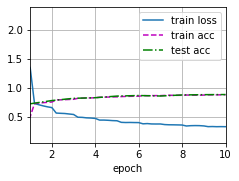

In [8]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, utils.try_gpu(7))